In [1]:
from Task1 import *
from PreprocLib2 import *

warnings.filterwarnings('ignore')

In [2]:
import cv2 as cv
def dilate(img, mask):
    kernel = np.ones((mask,mask),np.uint8)
    dil = cv.dilate(img,kernel,iterations = 1)
    f = MImage()
    f.arr = dil - img
    f.Consistent()
    return f

In [3]:
def image_binary_read2(name, width, height, offset=0):
        with open(name, mode='rb') as file:
            data = np.fromfile(file, dtype='<h')[offset:].reshape(height, width)

        return data

In [4]:
def threshold(img, const):
    for i in range(img.arr.shape[0]):
        for j in range(img.arr.shape[1]):
            if(img.arr[i,j] < const):
                img.arr[i,j] = np.random.uniform(0,255)
    img.Consistent()

In [5]:
arr = image_binary_read2('./images/brain-H_x512.bin', 512, 512)

In [6]:
type(arr[0][0])

numpy.int16

In [7]:
Подружить градационные преобразования с этими картинками мне так и не удалось, поэтому только эквализация. 

SyntaxError: invalid syntax (518762010.py, line 1)

In [ ]:
def tresh(arr):
    np.quantile(arr, 5)

In [ ]:
np.quantile(arr, 0.25)

In [ ]:
img = MImage()
img.arr = arr.copy()
img.Consistent()
img.ToGray()
# img.equalize_image()
# img.Gamma_transformation(10, 0.5)
img.Show()

In [10]:
img.SaveJpg('1.jpg')

In [11]:
from __future__ import print_function
import numpy as np
import argparse
import cv2
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

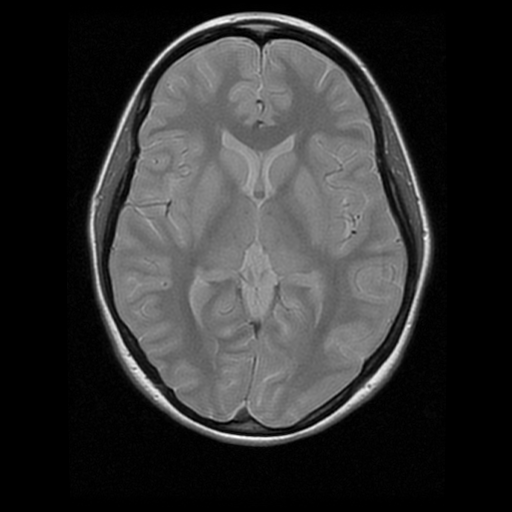

In [12]:
img = MImage()
img.arr = arr.copy()
img.ToGray()
img.Show()

In [31]:
type(arr[0][0])

numpy.int16

In [33]:
arr.max()

1468

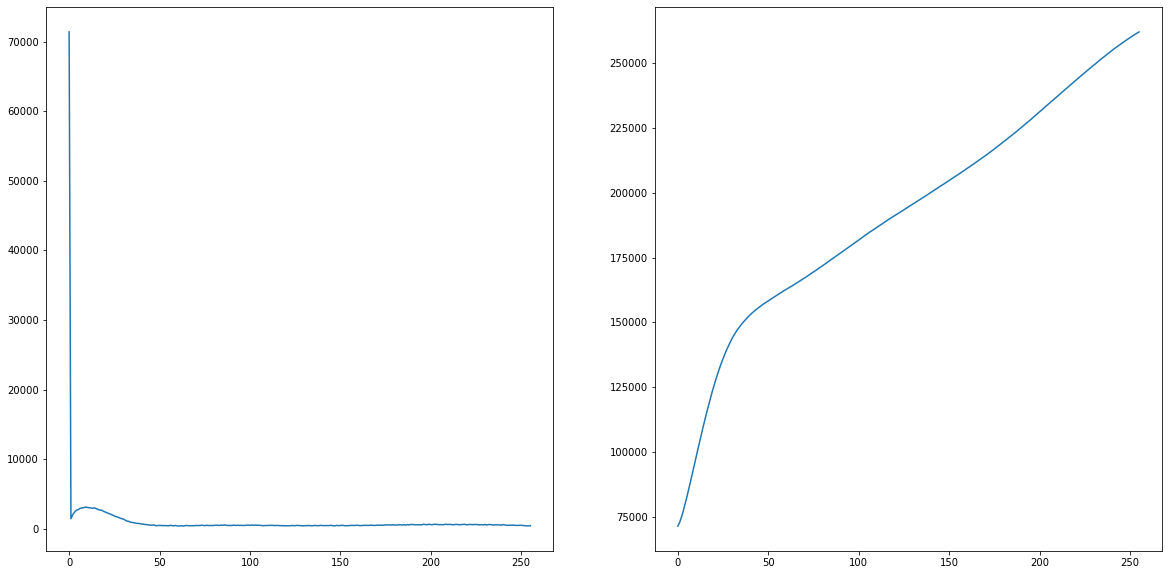

In [34]:
img.PrintHistAndCdf()

Очень много черного цвета, который все портит. Все, что меньше 3 заменяем на случайное число [0:255]. 

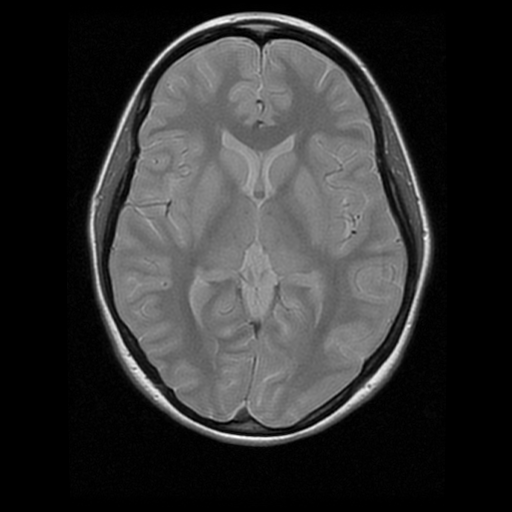

In [142]:
img = MImage()
img.arr = arr.copy()
img.ToGray()
img.Show()

In [115]:
type(img.arr[0][0])

numpy.uint8

In [129]:
w = dilate(img.arr, 3)

In [130]:
w.arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

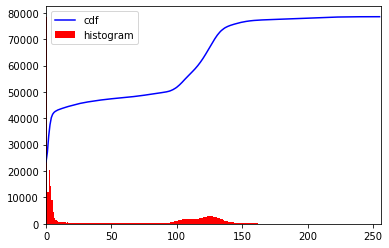

In [13]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('1.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [14]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [16]:
img = cv.imread('2/2.jpg',0)
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv.imwrite('2/res.png',img)

True

In [65]:
img = cv.imread('2.jpg',0)

In [13]:
def adjust_gamma(image, с = 1, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([(с*(i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv.LUT(image, table)

In [14]:
#По статье
image = cv.imread('res.png',0)

std = image.std()

mean = image.mean()

c = mean + 2*std  
a = mean - 2*std

g = 'low' if a/c < 1/3 else 'hight'

gamma = 0
с = 0
if g == 'low':
    gamma = np.log2(std)/12
    #с = 1/(1+numpy.heaviside(0.5-mean))
else: 
    gamma = np.exp((1-(mean+std))/2)

gm = adjust_gamma(image, gamma=gamma)

cv.imwrite('gamma.jpg', gm)


#g = 'low' if np.diff(mean + 2*std, mean - 2*std)



True

In [56]:
gamma

0.5328265302237493

In [37]:
-np.log2(std)

-6.393918362684991

In [26]:
c = mean + 2*std  

In [27]:
a = mean - 2*std

In [30]:
np.abs(a / c)

0.29230020080686897

In [53]:
image = cv.imread('res.png',0)
f = adjust_gamma(image, gamma=0.53)

In [54]:
cv2.imwrite('gamme.jpg', f)

True

In [19]:
img2 = cdf[img]

In [148]:
for i in range(img.arr.shape[0]):
    for j in range(img.arr.shape[1]):
        if(img.arr[i,j] < 30):
            img.arr[i,j] = np.random.uniform(0,255)
img.Consistent()


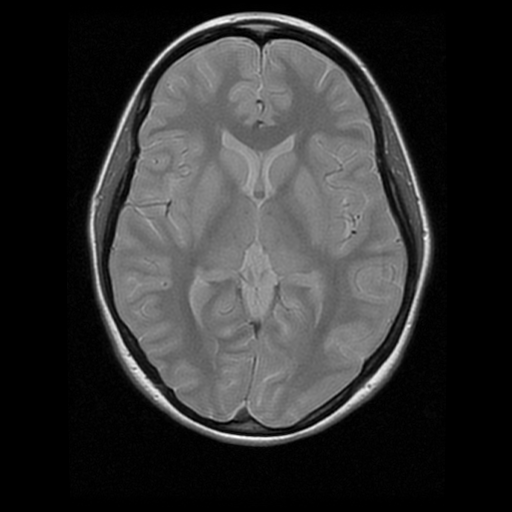

In [14]:
img.Show()

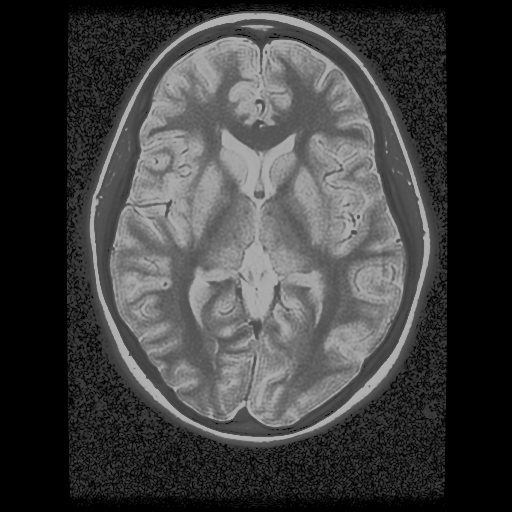

In [15]:
img.equalize_image()
img.Show()

In [ ]:
from __future__ import print_function
from builtins import input
import cv2 as cv
import numpy as np
import argparse


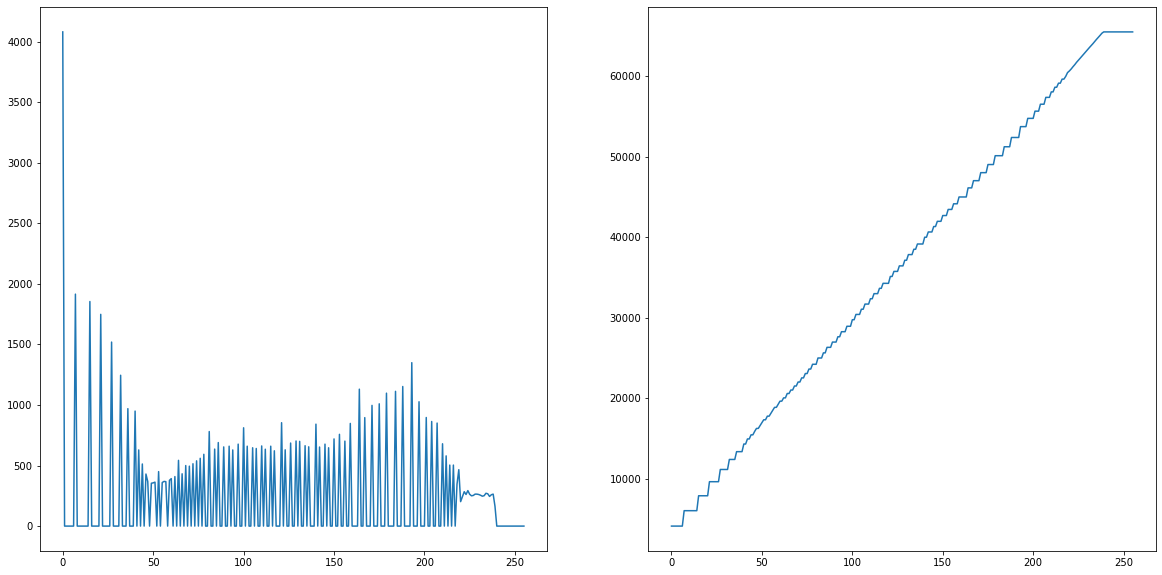

In [155]:
img.PrintHistAndCdf()

In [42]:
img.equalize_image()

In [43]:
img.arr.mean()

129.1117401123047

In [144]:
img.Gamma_transformation(30, 0.34)

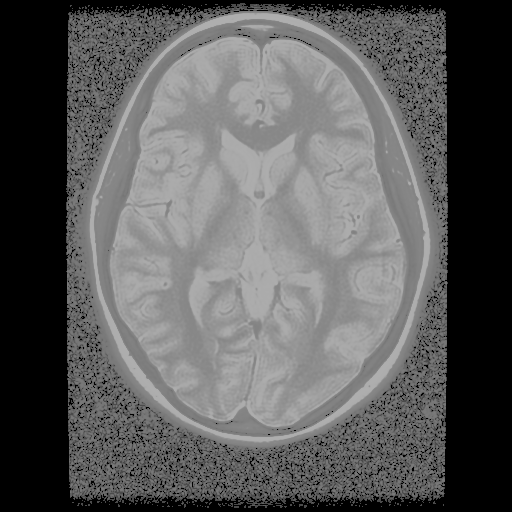

In [145]:
img.Show()

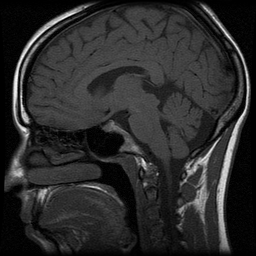

In [57]:
arr = image_binary_read2('./images/brain-V_x256.bin', 256, 256)
img = MImage()
img.arr = arr.copy()
img.ToGray()
img.Show()

In [62]:
img.SaveJpg('4.jpg')

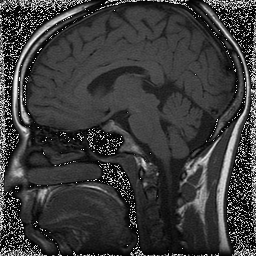

In [614]:
threshold(img, 3)
img.Show()

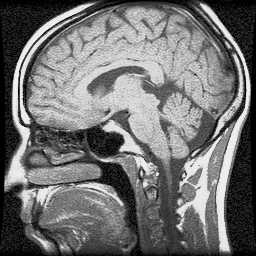

In [157]:
img.equalize_image()
img.Show()

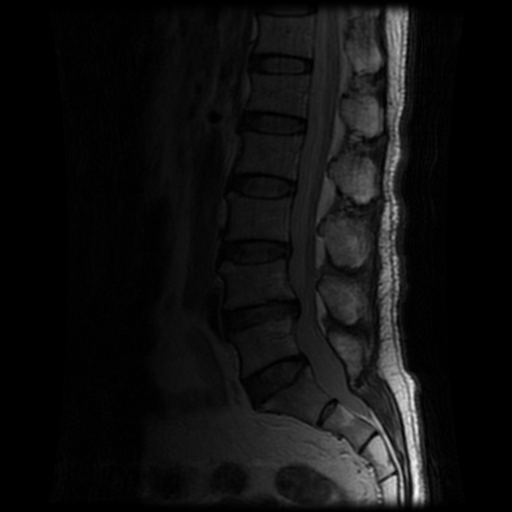

In [59]:
arr = image_binary_read('./images/spine-V_x512.bin', 512, 512)
img = MImage()
img.arr = arr.copy()
img.ToGray()
img.Show()

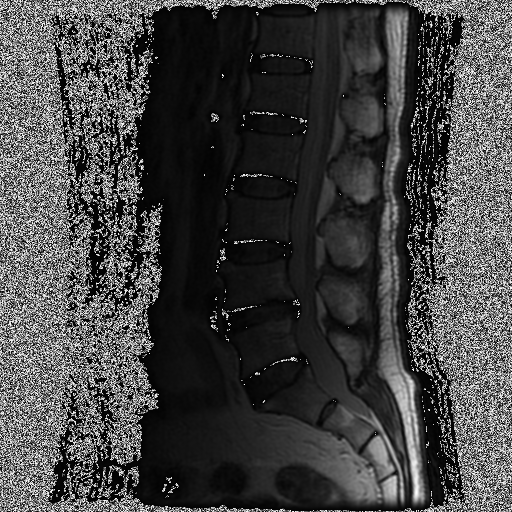

In [643]:
threshold(img, 3)
img.Show()

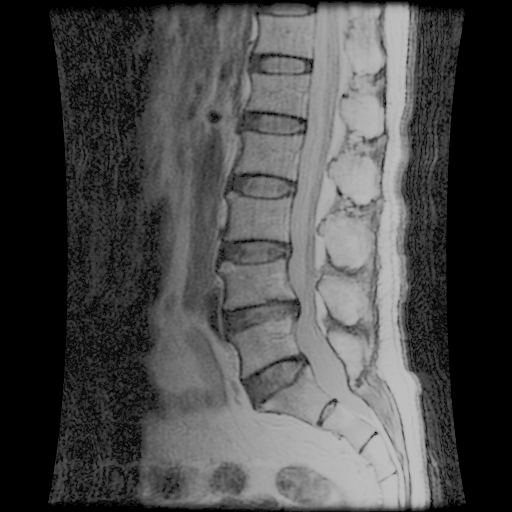

In [159]:
img.equalize_image()
img.Show()

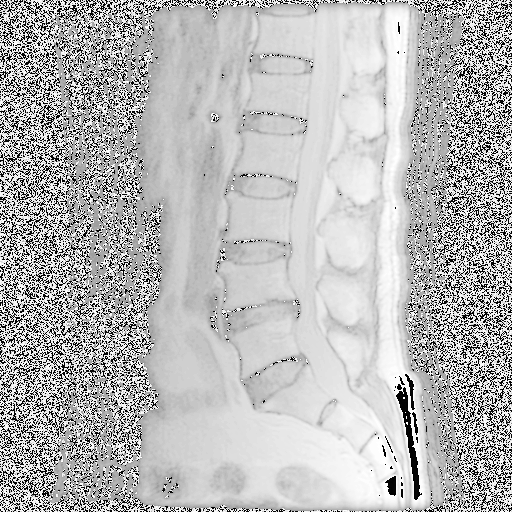

In [646]:
img.ToGray()
img.Shift(10)
img.Show()

In [639]:
Gamma_correction(img, 15, 0.25)

In [640]:
img.ToGray()

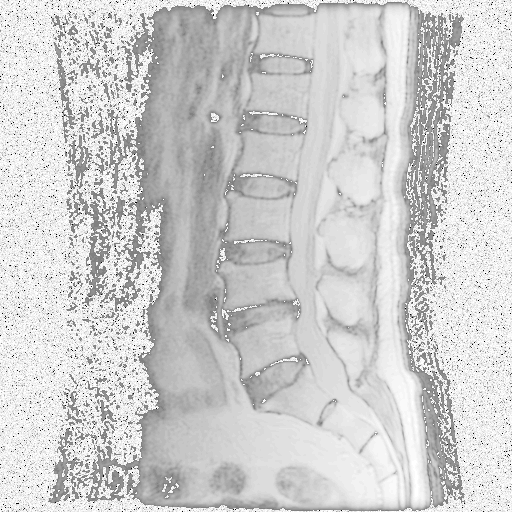

In [641]:
img.Show()

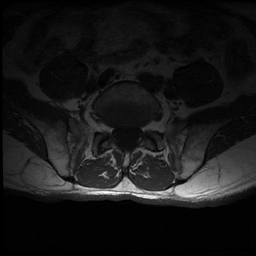

In [61]:
arr = image_binary_read2('./images/spine-H_x256.bin', 256, 256)
img = MImage()
img.arr = arr.copy()
img.ToGray()
img.Show()

In [252]:
img.equalize_image()

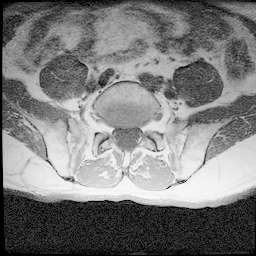

In [253]:
img.Show()

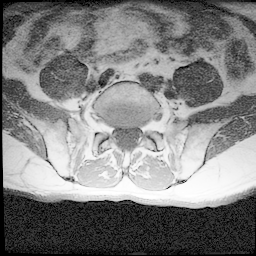

In [254]:
img.ToGray()
img.Show()

In [257]:
lol = img.Copy()

In [ ]:
lol = img.Copy()
#lol.Gamma_transformation(7,0.5)
lol.Log_transformation(7)
lol.Show()

In [235]:
img.arr

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 22, 22, 22],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [193]:
k = 1/img.arr.var()

In [194]:
img.Log_transformation(10)

In [195]:
hpw = Analysis.lpf(10, m=8, dt=1)
br = GetBorders(img, hpw);
br.Show()

NameError: name 'GetBorders' is not defined

In [105]:
img.Negative()

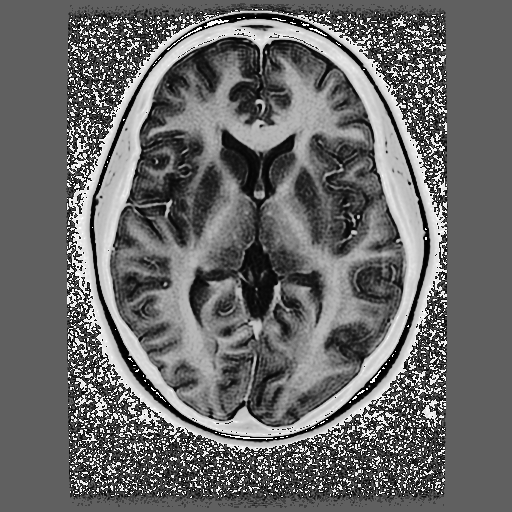

In [106]:
hpw = Analysis.lpf(50, m=8, dt=1)
br = GetBorders(img, hpw);
br.Show()

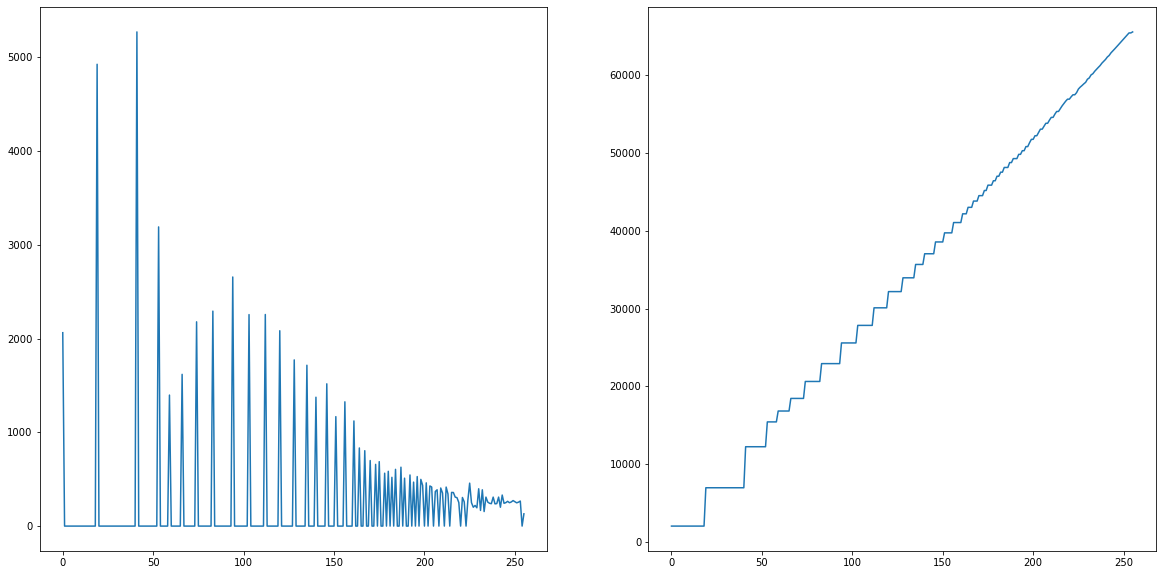

In [204]:
img.PrintHistAndCdf()

In [108]:
br.equalize_image()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [109]:
br.ToGray()

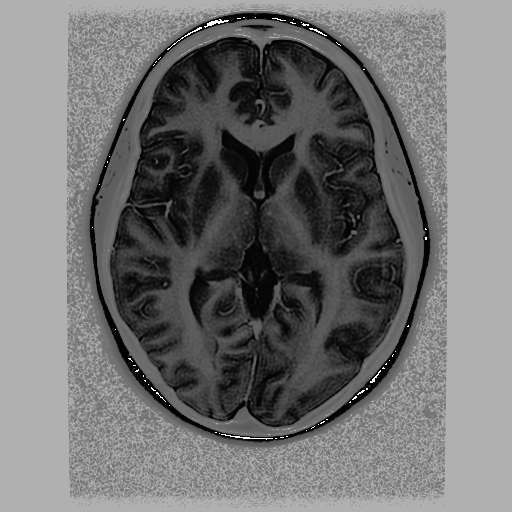

In [110]:
br.Show()

In [111]:
br.equalize_image()

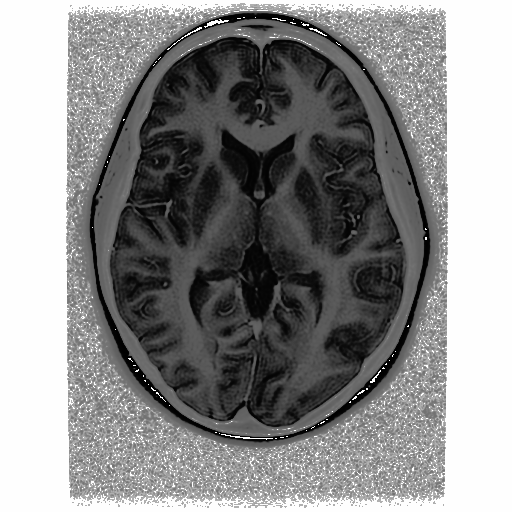

In [112]:
br.Show()

In [113]:
br.ToGray()
br.Negative()

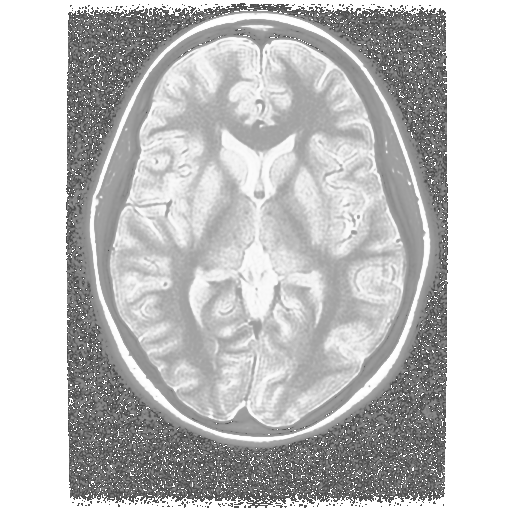

In [114]:
br.Show()

In [115]:
br.Negative()

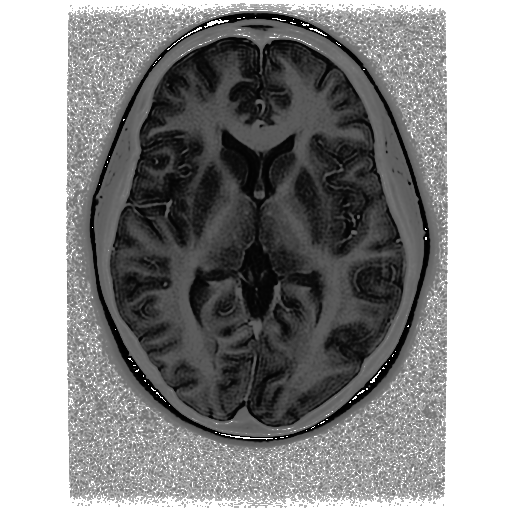

In [116]:
br.Show()

In [117]:
def GetBorders(image: MImage, filt: np.array):
    res = image
    hpf = filt
    filtred = []
    for i in res.arr:
        filtred.append(signal.convolve(i, hpf, 'same'))
    flt = np.array(filtred)
    flt2 = np.transpose(res.arr)
    filtred = []
    for i in range(res.arr.shape[1]):
        filtred.append(signal.convolve(res.arr[:,i], hpf, 'same'))

    flt2 = np.array(filtred)
    res2 = flt + np.transpose(flt2)
    ret = MImage()
    ret.arr = res2
    ret.Consistent()
    return ret

In [87]:
def Gamma_transformation(img, c, gamma):
    i = 0
    for row in img.arr:
        img.arr[i] = np.multiply(c,np.power(row, gamma))
        i += 1
    img.arr = img.arr
    img.Consistent()

In [273]:
Gamma_transformation(arr, 95, 0.5)

AttributeError: 'numpy.ndarray' object has no attribute 'arr'

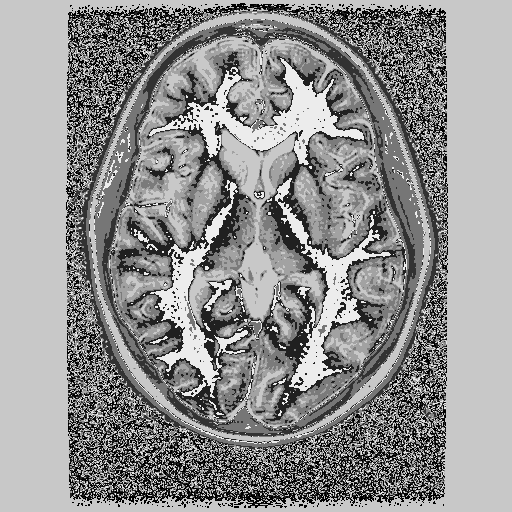

In [96]:
br.Show()

In [118]:
br.ToGray()

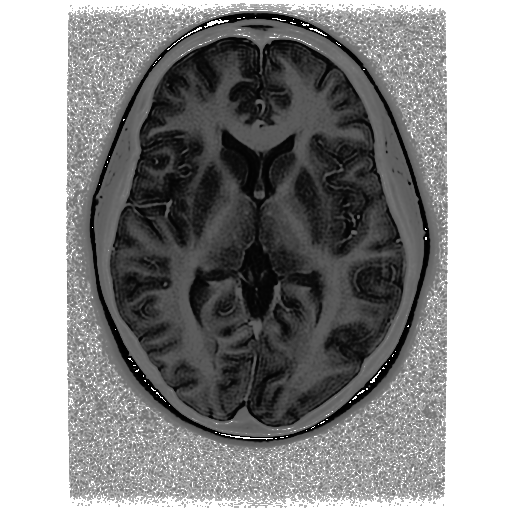

In [119]:
br.Show()

In [570]:
def Gamma_correction(img, c, gamma):
    m = img.arr.shape[0]
    n = img.arr.shape[1]
    
    for i in range(m):
        for j in range(n):
            img.arr[i, j] = c*(img.arr[i,j]**gamma)

In [571]:
Gamma_correction(img, 1, 0.5)

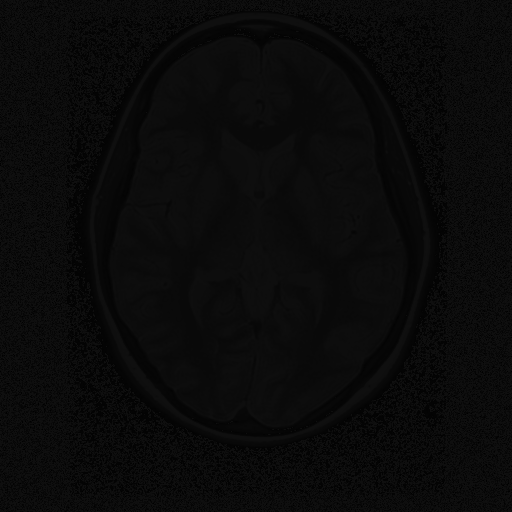

In [572]:
img.Show()

In [133]:
img.equalize_image()

In [466]:
def histogram1(image: np.ndarray, pixel_colors_count: int) -> (np.ndarray, str):
    h = [0] * pixel_colors_count
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            i = int(image[x, y])
            h[i] = h[i] + 1
    return np.array(h)

def cdf1(histogram: np.ndarray) -> np.ndarray:
        h = [0] * len(histogram)
        for x in range(len(histogram)):
            for y in range(x + 1):
                h[x] = h[x] + histogram[y]

        return np.array(h)
    
    
def inverse_cdf(cdf: np.ndarray):
    x_array = np.linspace(0, len(cdf) - 1, len(cdf))
    y_array = cdf

    max_x = x_array[len(cdf) - 1]
    max_y = y_array[len(cdf) - 1]

    new_x_array = y_array.astype(np.float64)
    new_y_array = x_array

    new_y_array *= int(max_y / max_x)
    new_x_array /= int(max_y / max_x)

    for i in range(len(new_x_array)):
        new_x_array[i] = round(new_x_array[i])

    return [new_x_array.astype(np.int64), new_y_array]


def equalize_numba(image: np.ndarray, cdf_x: np.ndarray, cdf_y: np.ndarray) -> np.ndarray:
        new_image = image
        cdf_min = np.min(cdf_y)

        for x in range(image.shape[0]):
            for y in range(image.shape[1]):
                idx = int(cdf_x[new_image[x, y]])
                new_image[x, y] = round(
                    (cdf_y[idx] - cdf_min) * 255.0 / (image.shape[0] * image.shape[1] - 1)
                )

        return new_image


def equalize_image(image: MImage, max_type_colors_count=-1, is_inverse_cdf=False):
        if max_type_colors_count < 0:
            max_type_colors_count = int(np.iinfo(image.arr.dtype).max + 1)

        histogram = np.array(histogram1(
            np.array(image.arr),
            max_type_colors_count
        ))

        cdf_y = np.array(cdf1(histogram))
        cdf_x = np.linspace(0, len(cdf_y) - 1, len(cdf_y))

        if is_inverse_cdf:
            cdf = inverse_cdf(cdf_y)
            cdf_y = cdf1[1]
            cdf_x = cdf1[0]

        cdf_x = np.array(cdf_x)
        cdf_y = np.array(cdf_y)

        image_equalized = equalize_numba(np.array(image.arr), cdf_x, cdf_y)
        return image_equalized

In [558]:
def automatic_brightness_and_contrast(image: MImage, clip_hist_percent=1):
        hist = histogram1(image.arr, 256# int(np.iinfo(image.arr.dtype).max + 1))
                         )
        accumulator = cdf1(hist)
        maximum = accumulator[-1]
        clip_hist_percent *= (maximum / 100.0)

        minimum_gray = 0
        while accumulator[minimum_gray] < clip_hist_percent:
            minimum_gray += 1

        maximum_gray = len(hist) - 1
        while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
            maximum_gray -= 1

        median = np.median(accumulator)
        medium_gray = 0
        while accumulator[medium_gray] < median:
            medium_gray += 1

        gamma = np.abs(np.log(np.abs(medium_gray - minimum_gray)/np.abs(maximum_gray - medium_gray)))
        print(gamma)
        image.Gamma_transformation(1250, gamma)

In [559]:
copy = img.Copy()

In [566]:
automatic_brightness_and_contrast(copy, 5)

1.5244446996007077


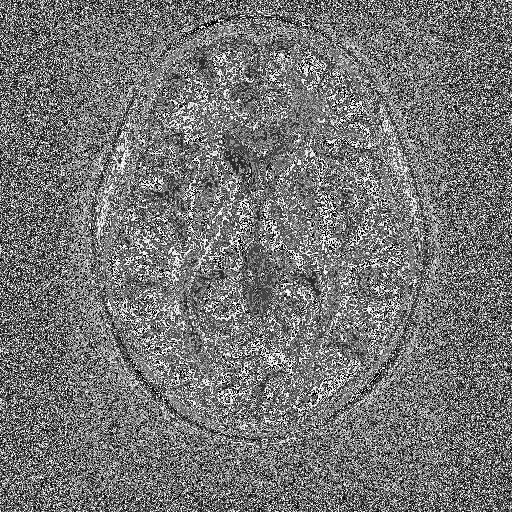

In [567]:
copy.Show()

In [568]:
copy.ToGray()

In [569]:
def pixelVal(pix, r1, s1, r2, s2):

    if (0 <= pix and pix <= r1):

        return (s1 / r1)*pix

    elif (r1 < pix and pix <= r2):

        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1

    else:

        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2